In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from collections import defaultdict
import ipywidgets as widgets

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set_style("whitegrid")

In [20]:
artifacts_dir = "/etc/skel/sandmark-nightly/parallel/"

In [21]:
bench_files = []

artifacts_path = artifacts_dir.split("/parallel/")[0]

for root, dirs, files in os.walk(artifacts_dir):
    for file in files:
        if file.endswith("_1.orunchrt.summary.bench"):
            f = root.split("/parallel/")
            bench_files.append((os.path.join(root, file)))

In [22]:
for b in bench_files :
    print(b + '\n')

/home/sk/sandmark-nightly/parallel/20210608_084403/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210608_141854/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210608_141854/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210608_120547/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210608_120547/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench

/home/sk/sandmark-nightly/parallel/20210609_0

In [23]:
benches = defaultdict(list)
for x in bench_files:
    l = x.split("/parallel/")[1]
    print(l)
    d = l.split("/")
    timestamp    = d[0]
    commit       = d[1]
    variant      = d[2]
    variant_root = d[2].split('_')[0]
    variant_stem = d[2].split('_')[1]
    value        = variant_root + '+' + commit + '_' + variant_stem
    benches[timestamp].append(value)
benches = dict(benches)

20210608_084403/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench
20210608_141854/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
20210608_141854/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench
20210608_120547/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
20210608_120547/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orunchrt.summary.bench
20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
20210609_000004/18c483d54de6fa7ec474521de01d319cb5dedd44/4.12.0+domains+effects_1.orunchrt.summary.bench


In [24]:
benches

{'20210608_084403': ['4.12.0+domains+71258842a9f97393f62dd5e3cb0074c19958df69_1.orunchrt.summary.bench',
  '4.12.0+domains+effects+06d5aa0bf63778de509a7eee129bb5f31508466f_1.orunchrt.summary.bench'],
 '20210608_141854': ['4.12.0+domains+71258842a9f97393f62dd5e3cb0074c19958df69_1.orunchrt.summary.bench',
  '4.12.0+domains+effects+06d5aa0bf63778de509a7eee129bb5f31508466f_1.orunchrt.summary.bench'],
 '20210608_120547': ['4.12.0+domains+71258842a9f97393f62dd5e3cb0074c19958df69_1.orunchrt.summary.bench',
  '4.12.0+domains+effects+06d5aa0bf63778de509a7eee129bb5f31508466f_1.orunchrt.summary.bench'],
 '20210609_000004': ['4.12.0+domains+71258842a9f97393f62dd5e3cb0074c19958df69_1.orunchrt.summary.bench',
  '4.12.0+domains+effects+18c483d54de6fa7ec474521de01d319cb5dedd44_1.orunchrt.summary.bench']}

In [25]:
def f(x): return x

def disp(benches):
    
    def select_commit(timestamp):
        variantW.options = benches[timestamp]
    
    def do_nothing(variant):
        pass
    
    timestamp_list = sorted(list(benches.keys()), reverse=True)
    timestampW = widgets.Dropdown(options=timestamp_list, description='Timestamp', disabled=False)
    timestampD = widgets.interactive(select_commit, timestamp=timestampW)
    
    variantW = widgets.Dropdown(options=benches[timestampW.value], description='Variant', disabled=False)
    variantD = widgets.interactive(do_nothing, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       width='100%')
    items = [timestampD, variantD]
    box = Box(children=items, layout=box_layout)
    display(box)
    return (timestampD, variantD)

def get_filename(t, v):
    timestamp = t.children[0].value
    commit_id = v.children[0].value.split('_')[0].split('+')[-1]
    variant   = v.children[0].value.split('_')[0].split('+')
    variant.pop()
    variant   = '+'.join(variant) + '_' + v.children[0].value.split('_')[1]
    filename  = os.path.join(
        artifacts_path, 
        "parallel", 
        timestamp,
        commit_id,
        variant
        )
    print(filename)
    return filename

In [26]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [27]:
print(comparisons.result)

2


In [28]:
matrix = [[0 for x in range(3)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210609_000004', '20210608_14…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210609_000004', '20210608_14…

In [29]:
for i in range(comparisons.result):
    matrix[i][2] = get_filename(matrix[i][0], matrix[i][1])

/home/sk/sandmark-nightly/parallel/20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
/home/sk/sandmark-nightly/parallel/20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench


In [30]:
selected_files = []
for i in range (comparisons.result):
    print(matrix[i][2])
    selected_files.append(matrix[i][2])

/home/sk/sandmark-nightly/parallel/20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench
/home/sk/sandmark-nightly/parallel/20210609_000004/71258842a9f97393f62dd5e3cb0074c19958df69/4.12.0+domains_1.orunchrt.summary.bench


In [35]:
data_frames = []

for file in selected_files:
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pd.json_normalize(data)
        value   = file.split('/parallel/')[1]
        date    = value.split('/')[0].split('_')[0]
        commit  = value.split('/')[1][:7]
        variant = value.split('/')[2].split('_')[0]
        df['variant'] = date + '_' + commit + '_' + variant
        df['name'] = df['name'].apply(lambda x : x.replace(".orunchrt", ""))
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name','time_secs']) 
# Uncomment the following to display all the lines in pandas output
# pd.set_option('display.max_rows', df.shape[0]+1)
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
99,LU_decomposition.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.032577,32.960287,0.072000,136240,68443.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17205031237,165,16777703,65633,2,0,16814346,16814346,0.873538,20210609_7125884_4.12.0+domains
99,LU_decomposition.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.032577,32.960287,0.072000,136240,68443.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17205031237,165,16777703,65633,2,0,16814346,16814346,0.873538,20210609_7125884_4.12.0+domains
76,LU_decomposition_multicore.12_2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.802501,44.416292,0.474997,129332,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17226084899,3130640,19910938,84587,1272,0,12925937,12966897,5.765154,20210609_7125884_4.12.0+domains
76,LU_decomposition_multicore.12_2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.802501,44.416292,0.474997,129332,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17226084899,3130640,19910938,84587,1272,0,12925937,12966897,5.765154,20210609_7125884_4.12.0+domains
71,LU_decomposition_multicore.16_2048,"chrt -r 1 taskset --cpu-list 2-13,16-27 ./LU_d...",2.927906,44.922276,0.601439,138356,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17244249830,4118872,20900166,88179,1125,0,13245393,13098985,6.727582,20210609_7125884_4.12.0+domains
71,LU_decomposition_multicore.16_2048,"chrt -r 1 taskset --cpu-list 2-13,16-27 ./LU_d...",2.927906,44.922276,0.601439,138356,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17244249830,4118872,20900166,88179,1125,0,13245393,13098985,6.727582,20210609_7125884_4.12.0+domains
22,LU_decomposition_multicore.1_2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.371371,33.291061,0.079997,103676,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17205053178,9831,16787369,65690,58,0,12628231,12628231,1.062114,20210609_7125884_4.12.0+domains
22,LU_decomposition_multicore.1_2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.371371,33.291061,0.079997,103676,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17205053178,9831,16787369,65690,58,0,12628231,12628231,1.062114,20210609_7125884_4.12.0+domains
4,LU_decomposition_multicore.20_2048,"chrt -r 1 taskset --cpu-list 2-13,16-27 ./LU_d...",2.615478,49.210710,1.019721,146396,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17268290364,5110663,21892935,90475,958,0,4853445,13210593,7.909639,20210609_7125884_4.12.0+domains
4,LU_decomposition_multicore.20_2048,"chrt -r 1 taskset --cpu-list 2-13,16-27 ./LU_d...",2.615478,49.210710,1.019721,146396,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,17268290364,5110663,21892935,90475,958,0,4853445,13210593,7.909639,20210609_7125884_4.12.0+domains


In [36]:
def getFastestSequential(df,topic):
    fastest_sequential = {}
    for g in df.groupby(['name']):
        (n,d) = g
        fastest_sequential[n] = min(list(d[topic]))
    return fastest_sequential

def normalize(sdf, mdf, topic):
    frames = []
    fastest_sequential = getFastestSequential(sdf, topic)
    for g in mdf.groupby('name'):        
        (n,d) = g
        n = n.replace('_multicore','')
        d['n'+topic] = 1 / d[topic].div(fastest_sequential[n],axis=0)
        d['b'+topic] = int(fastest_sequential[n])
        frames.append(d)
    return pd.concat(frames)


# Sequential runs
sdf = df.loc[~df['name'].str.contains('multicore',regex=False),:]
throughput_sdf = pd.DataFrame.copy(sdf)

# Multicore runs
mdf = df.loc[df['name'].str.contains('multicore',regex=False),:]
mdf['num_domains'] = mdf['name'].str.split('.',expand=True)[1].str.split('_',expand=True)[0]
mdf['num_domains'] = pd.to_numeric(mdf['num_domains'])
mdf['name'] = mdf['name'].replace('\..*?_','.',regex=True)

mdf = normalize(sdf,mdf,"time_secs")
throughput_mdf = pd.DataFrame.copy(mdf)
mdf.sort_values(['name','variant','num_domains'])

<ipython-input-36-0147373d3a46>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['num_domains'] = mdf['name'].str.split('.',expand=True)[1].str.split('_',expand=True)[0]
<ipython-input-36-0147373d3a46>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['num_domains'] = pd.to_numeric(mdf['num_domains'])
<ipython-input-36-0147373d3a46>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,num_domains,ntime_secs,btime_secs
22,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.371371,33.291061,0.079997,103676,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,65690,58,0,12628231,12628231,1.062114,20210609_7125884_4.12.0+domains,1,0.989848,33
22,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.371371,33.291061,0.079997,103676,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,65690,58,0,12628231,12628231,1.062114,20210609_7125884_4.12.0+domains,1,0.989848,33
23,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,17.234359,34.390776,0.063997,106156,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,73517,3559,0,12657157,12661253,1.736837,20210609_7125884_4.12.0+domains,2,1.916670,33
23,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,17.234359,34.390776,0.063997,106156,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,73517,3559,0,12657157,12661253,1.736837,20210609_7125884_4.12.0+domains,2,1.916670,33
46,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,8.915833,35.434280,0.172166,110616,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,78727,2941,0,12710913,12715009,2.606056,20210609_7125884_4.12.0+domains,4,3.704934,33
46,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,8.915833,35.434280,0.172166,110616,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,78727,2941,0,12710913,12715009,2.606056,20210609_7125884_4.12.0+domains,4,3.704934,33
79,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,4.830994,38.042934,0.289789,119740,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,82347,1809,0,12769273,12822521,4.057675,20210609_7125884_4.12.0+domains,8,6.837636,33
79,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,4.830994,38.042934,0.289789,119740,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,82347,1809,0,12769273,12822521,4.057675,20210609_7125884_4.12.0+domains,8,6.837636,33
76,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.802501,44.416292,0.474997,129332,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,84587,1272,0,12925937,12966897,5.765154,20210609_7125884_4.12.0+domains,12,8.687066,33
76,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.802501,44.416292,0.474997,129332,102764.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,84587,1272,0,12925937,12966897,5.765154,20210609_7125884_4.12.0+domains,12,8.687066,33


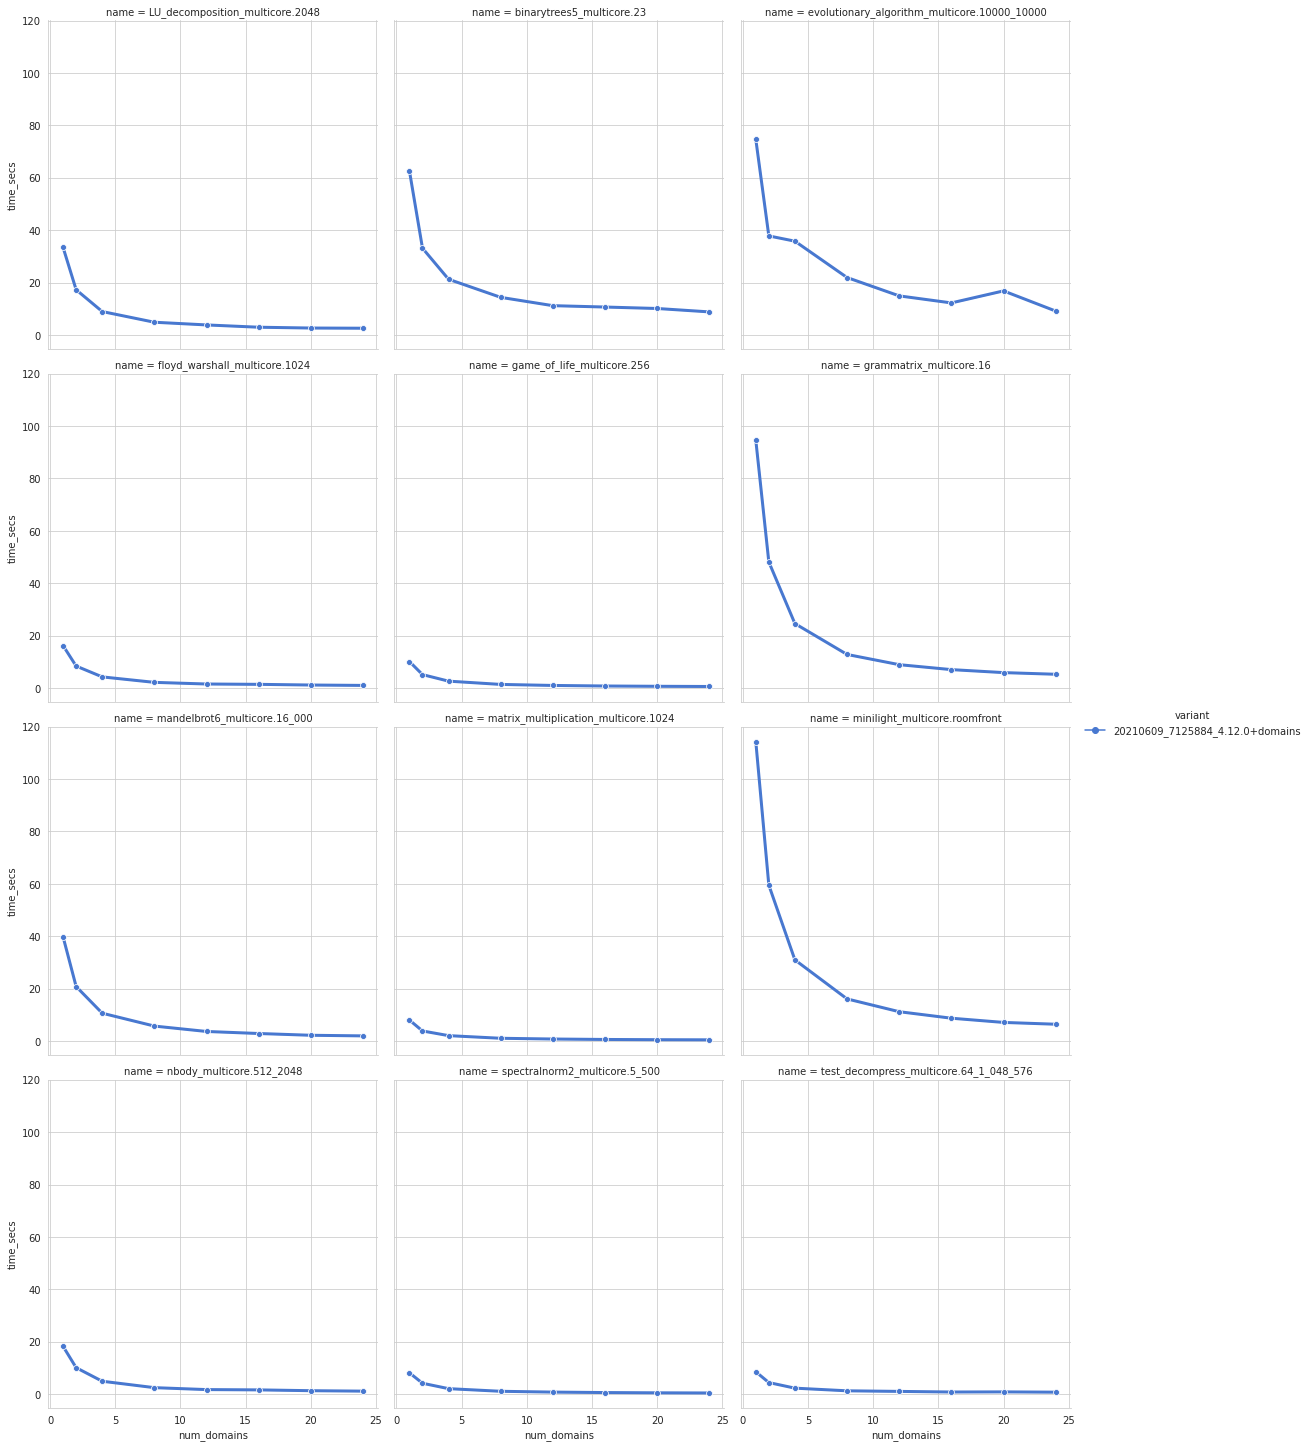

In [37]:
mdf = mdf.sort_values(['name'])
sns.relplot(x='num_domains', y = 'time_secs', hue='variant', col='name',
            data=mdf, kind='line', style='variant', markers=True, col_wrap = 3, 
            lw=3, palette="muted")

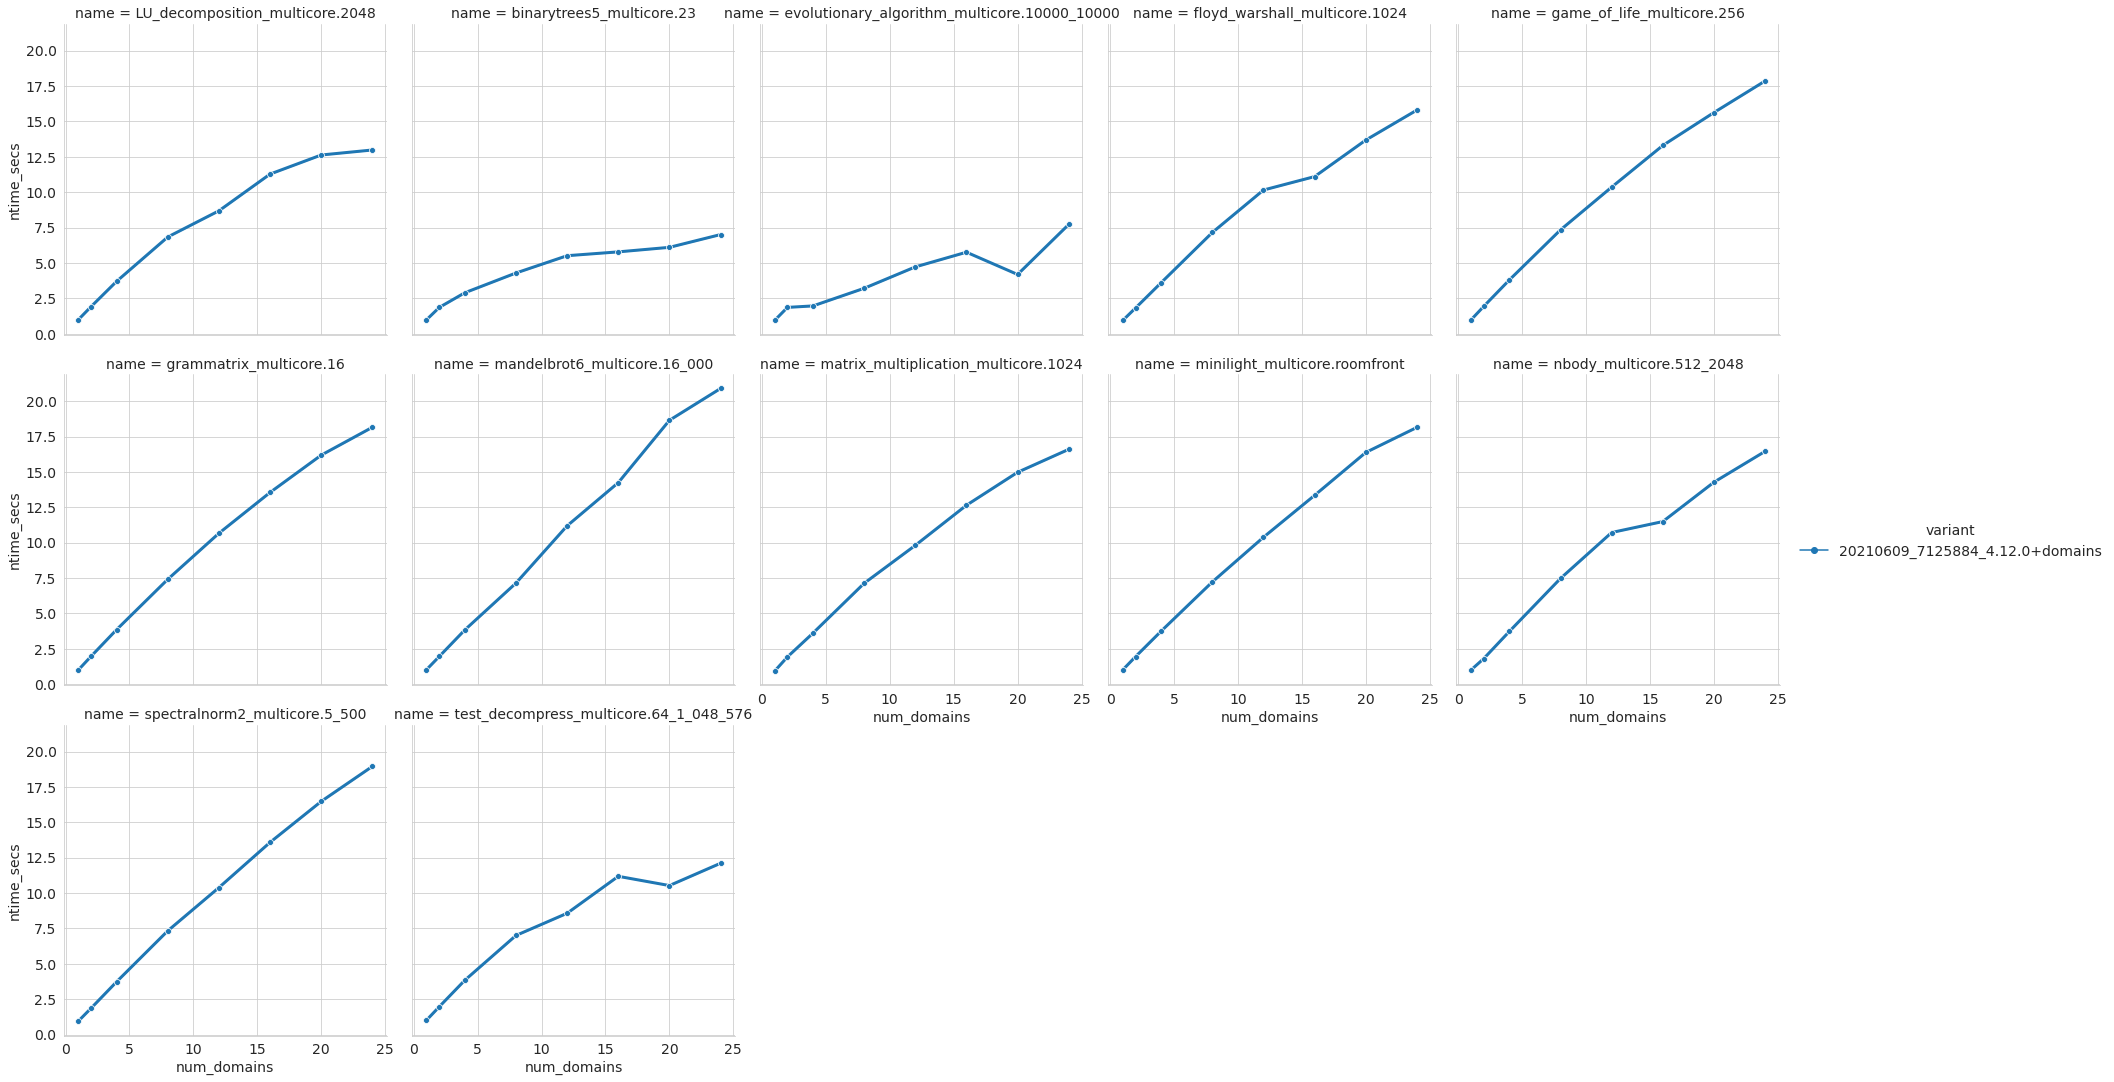

In [34]:
mdf = mdf.sort_values(['name'])
with sns.plotting_context(rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14,
                              "legend.fontsize":14}):
    sns.relplot(x='num_domains', y = 'ntime_secs', hue='variant', col='name',
                data=mdf, kind='line', style='variant', markers=True, col_wrap = 5, 
                lw=3)
